<a href="https://colab.research.google.com/github/AjmirSarker/AjmirSarker/blob/master/Betel_Leaf1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import sklearn.metrics as skl
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

import statsmodels.api as sm
import statsmodels.formula.api as smf

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:

df = pd.read_csv('/content/drive/MyDrive/BIGDATALAB/Betel Leaf.csv')
df.head()

,region,area,prod,year,windspeed,sunshine,rainfall,minTemp,maxtemp,humidity,cloudcover
0,1,0,0,1982,1.096,7.704,58.6,16.242,28.546,77.296,2.602
1,1,0,0,1983,0.830,6.928,8.4,15.956,27.826,76.858,2.294
2,1,40,15,1984,1.412,6.694,19.0,15.706,28.042,74.476,2.898
3,1,55,26,1985,0.874,7.232,31.6,15.340,27.636,75.976,2.780
4,1,60,30,1986,0.646,7.786,38.8,15.326,28.336,80.212,2.744


In [3]:
df

,region,area,prod,year,windspeed,sunshine,rainfall,minTemp,maxtemp,humidity,cloudcover
0,1,0,0,1982,1.096,7.704,58.6,16.242,28.546,77.296,2.602
1,1,0,0,1983,0.830,6.928,8.4,15.956,27.826,76.858,2.294
2,1,40,15,1984,1.412,6.694,19.0,15.706,28.042,74.476,2.898
3,1,55,26,1985,0.874,7.232,31.6,15.340,27.636,75.976,2.780
4,1,60,30,1986,0.646,7.786,38.8,15.326,28.336,80.212,2.744
...,...,...,...,...,...,...,...,...,...,...,...
1155,23,34,161,2017,0.766,6.386,10.0,15.840,28.042,76.476,1.366
1156,23,34,167,2018,0.746,6.592,4.4,15.248,28.854,76.124,1.170
1157,23,29,155,2019,0.558,7.294,10.4,15.256,27.196,77.158,1.294
1158,23,25,119,2020,0.446,6.720,13.2,15.092,27.352,73.400,1.162


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1160 entries, 0 to 1159
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   region      1160 non-null   int64  
 1   area        1160 non-null   int64  
 2   prod        1160 non-null   int64  
 3   year        1160 non-null   int64  
 4   windspeed   1160 non-null   float64
 5   sunshine    1160 non-null   float64
 6   rainfall    1160 non-null   float64
 7   minTemp     1160 non-null   float64
 8   maxtemp     1160 non-null   float64
 9   humidity    1160 non-null   float64
 10  cloudcover  1160 non-null   float64
dtypes: float64(7), int64(4)
memory usage: 99.8 KB


In [5]:
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

Series([], dtype: float64)

In [6]:
mod = smf.ols(formula='prod ~ region+area+year+windspeed+sunshine+rainfall+minTemp+maxtemp+humidity+cloudcover',data=df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   prod   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                     296.2
Date:                Tue, 13 Jun 2023   Prob (F-statistic):          1.13e-309
Time:                        05:07:24   Log-Likelihood:                -11369.
No. Observations:                1160   AIC:                         2.276e+04
Df Residuals:                    1149   BIC:                         2.282e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -1.09e+05      2e+04     -5.453      0.0

In [7]:
x = df[['region','area','year','windspeed','sunshine','rainfall','minTemp','maxtemp','humidity','cloudcover']]
y = df[['prod']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, train_size =0.70, random_state=1)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: 

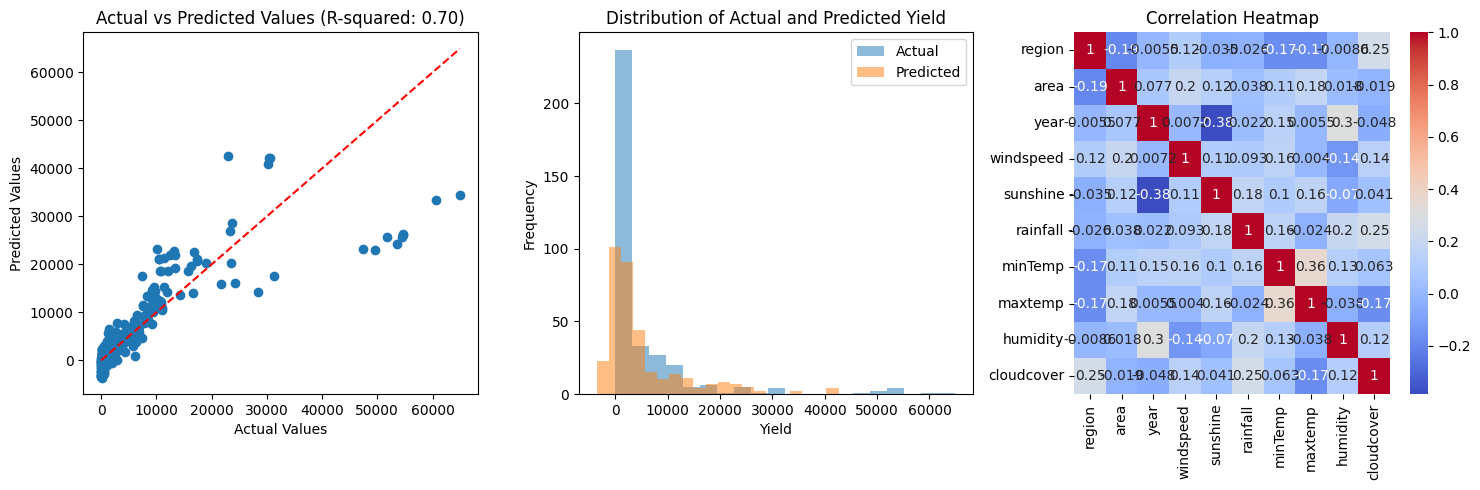

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr = LinearRegression()
lr.fit(x_train, y_train)
lr_predictions = lr.predict(x_test)
lr_accuracy = r2_score(y_test, lr_predictions)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Scatter plot of actual vs predicted values
axes[0].scatter(y_test, lr_predictions)
axes[0].set_xlabel("Actual Values")
axes[0].set_ylabel("Predicted Values")
axes[0].set_title("Actual vs Predicted Values (R-squared: {:.2f})".format(lr_accuracy))
axes[0].plot([np.min(y_test), np.max(y_test)], [np.min(y_test), np.max(y_test)], 'r--')

# Distribution plot of actual and predicted values
axes[1].hist(y_test, bins=20, alpha=0.5, label="Actual")
axes[1].hist(lr_predictions, bins=20, alpha=0.5, label="Predicted")
axes[1].set_xlabel("Yield")
axes[1].set_ylabel("Frequency")
axes[1].set_title("Distribution of Actual and Predicted Yield")
axes[1].legend()

# Heatmap of correlation between features
sns.heatmap(x_train.corr(), annot=True, cmap='coolwarm', ax=axes[2])
axes[2].set_title("Correlation Heatmap")

plt.tight_layout()
plt.show()


[05:24:57] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: 

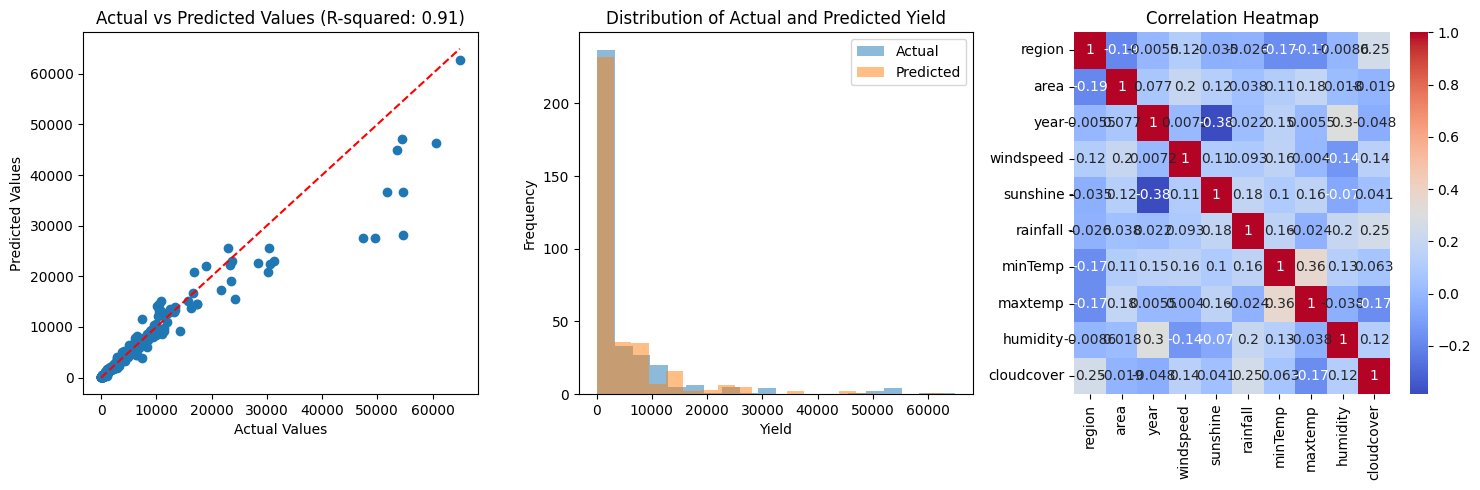

In [37]:
import xgboost as xg
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

xBoost = xg.XGBRegressor(objective='reg:linear', n_estimators=10, seed=123)
xBoost.fit(x_train, y_train)
xBoost_predictions = xBoost.predict(x_test)
xBoost_accuracy = r2_score(y_test, xBoost_predictions)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Scatter plot of actual vs predicted values
axes[0].scatter(y_test, xBoost_predictions)
axes[0].set_xlabel("Actual Values")
axes[0].set_ylabel("Predicted Values")
axes[0].set_title("Actual vs Predicted Values (R-squared: {:.2f})".format(xBoost_accuracy))
axes[0].plot([np.min(y_test), np.max(y_test)], [np.min(y_test), np.max(y_test)], 'r--')  # Plotting the ideal line

# Distribution plot of actual and predicted values
axes[1].hist(y_test, bins=20, alpha=0.5, label="Actual")
axes[1].hist(xBoost_predictions, bins=20, alpha=0.5, label="Predicted")
axes[1].set_xlabel("Yield")
axes[1].set_ylabel("Frequency")
axes[1].set_title("Distribution of Actual and Predicted Yield")
axes[1].legend()

# Heatmap of correlation between features
sns.heatmap(x_train.corr(), annot=True, cmap='coolwarm', ax=axes[2])
axes[2].set_title("Correlation Heatmap")

# Adjust spacing between subplots
plt.tight_layout()

# Display all the plots
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.914215088469447


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: 

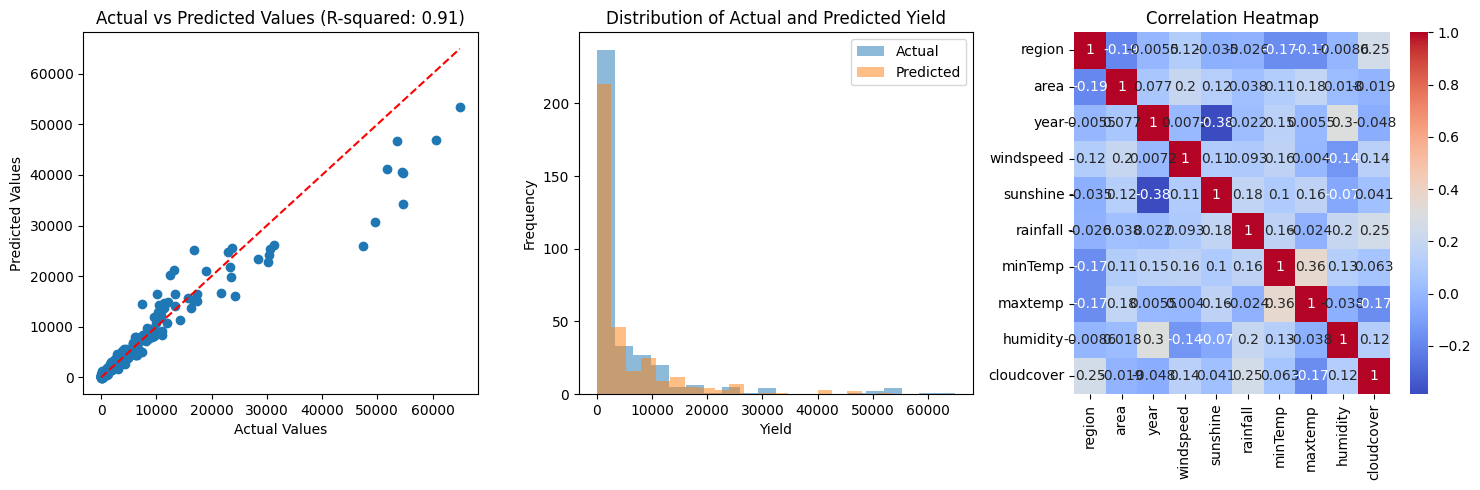

In [38]:
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Rest of the code for model training and prediction
gbr = GradientBoostingRegressor(random_state=0)
gbr.fit(x_train, y_train)
gbr_predictions = gbr.predict(x_test)
gbr_accuracy = r2_score(y_test, gbr_predictions)
print("Accuracy:", gbr_accuracy)

# Create subplots with 1 row and 3 columns
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Scatter plot of actual vs predicted values
axs[0].scatter(y_test, gbr_predictions)
axs[0].set_xlabel("Actual Values")
axs[0].set_ylabel("Predicted Values")
axs[0].set_title("Actual vs Predicted Values (R-squared: {:.2f})".format(gbr_accuracy))
axs[0].plot([np.min(y_test), np.max(y_test)], [np.min(y_test), np.max(y_test)], 'r--')  # Plotting the ideal line

# Distribution plot of actual and predicted values
axs[1].hist(y_test, bins=20, alpha=0.5, label="Actual")
axs[1].hist(gbr_predictions, bins=20, alpha=0.5, label="Predicted")
axs[1].set_xlabel("Yield")
axs[1].set_ylabel("Frequency")
axs[1].set_title("Distribution of Actual and Predicted Yield")
axs[1].legend()

# Heatmap of correlation between features
sns.heatmap(x_train.corr(), annot=True, cmap='coolwarm', ax=axs[2])
axs[2].set_title("Correlation Heatmap")

# Adjust spacing between subplots
plt.tight_layout()

# Display all the plots
plt.show()


<ipython-input-39-5545502d2c4b>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(x_train, y_train)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over t

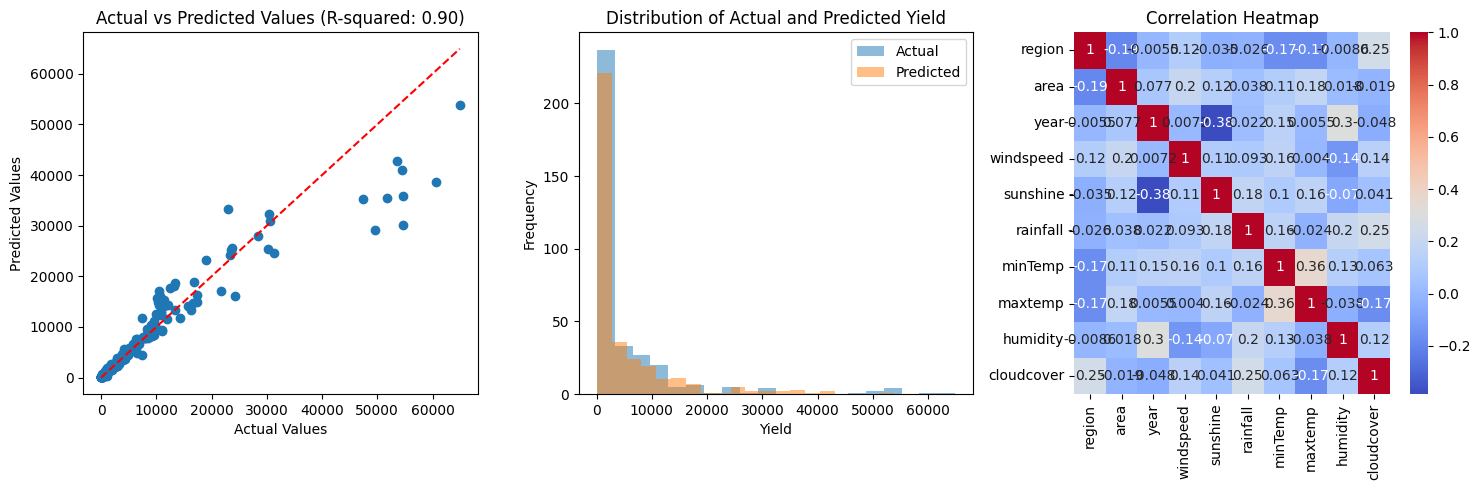

In [39]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Random Forest Regression model and predictions
rfr = RandomForestRegressor(n_estimators=100, random_state=0)
rfr.fit(x_train, y_train)
rfr_predictions = rfr.predict(x_test)
rfr_accuracy = r2_score(y_test, rfr_predictions)

# Create subplots with 1 row and 3 columns
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Scatter plot of actual vs predicted values
axes[0].scatter(y_test, rfr_predictions)
axes[0].plot([np.min(y_test), np.max(y_test)], [np.min(y_test), np.max(y_test)], 'r--')
axes[0].set_xlabel("Actual Values")
axes[0].set_ylabel("Predicted Values")
axes[0].set_title("Actual vs Predicted Values (R-squared: {:.2f})".format(rfr_accuracy))

# Distribution plot of actual and predicted values
axes[1].hist(y_test, bins=20, alpha=0.5, label="Actual")
axes[1].hist(rfr_predictions, bins=20, alpha=0.5, label="Predicted")
axes[1].set_xlabel("Yield")
axes[1].set_ylabel("Frequency")
axes[1].set_title("Distribution of Actual and Predicted Yield")
axes[1].legend()

# Heatmap of correlation between features
sns.heatmap(x_train.corr(), annot=True, cmap='coolwarm', ax=axes[2])
axes[2].set_title("Correlation Heatmap")

# Adjust the spacing between subplots
plt.tight_layout()

# Display the figure with all the plots
plt.show()


Accuracy: 0.8610698507298721
R-squared: 0.8610698507298721
Mean Squared Error: 13517704.781609196
Mean Absolute Error: 1134.7298850574712


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: 

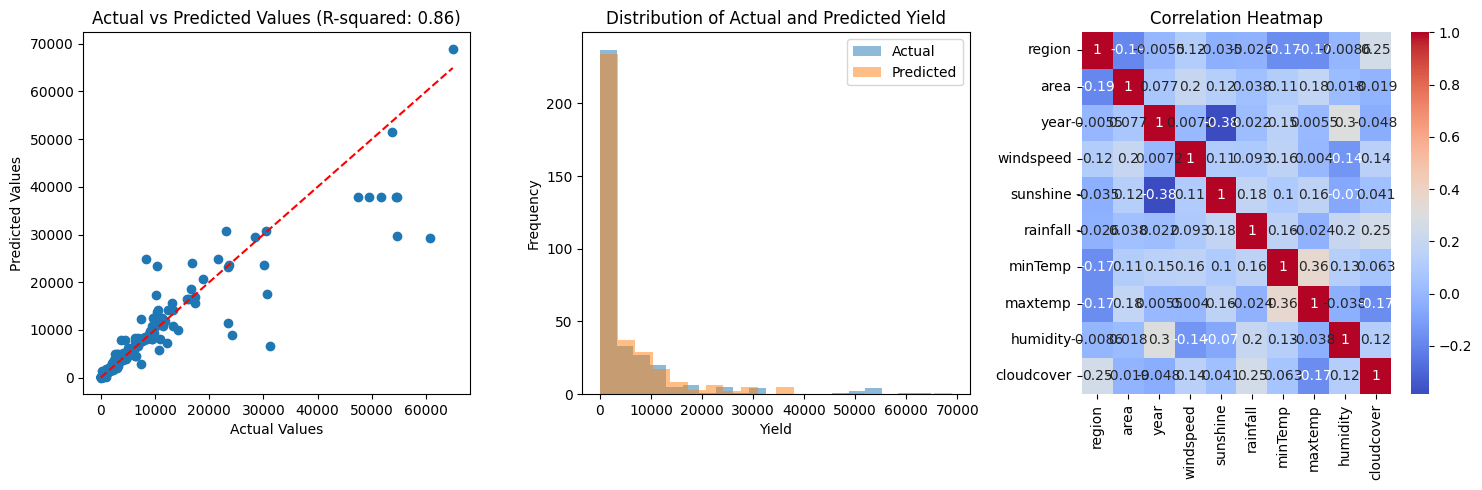

In [40]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Train the Decision Tree Regressor model
dtr = DecisionTreeRegressor(random_state=0)
dtr.fit(x_train, y_train)
dtr_predictions = dtr.predict(x_test)
dtr_accuracy = r2_score(y_test, dtr_predictions)

# Create subplots with 1 row and 3 columns
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Calculate evaluation metrics
dtr_r2 = r2_score(y_test, dtr_predictions)
dtr_mse = mean_squared_error(y_test, dtr_predictions)
dtr_mae = mean_absolute_error(y_test, dtr_predictions)
print("Accuracy:", dtr_accuracy)
print("R-squared:", dtr_r2)
print("Mean Squared Error:", dtr_mse)
print("Mean Absolute Error:", dtr_mae)

# Scatter plot of actual vs predicted values
axes[0].scatter(y_test, dtr_predictions)
axes[0].plot([np.min(y_test), np.max(y_test)], [np.min(y_test), np.max(y_test)], 'r--')
axes[0].set_xlabel("Actual Values")
axes[0].set_ylabel("Predicted Values")
axes[0].set_title("Actual vs Predicted Values (R-squared: {:.2f})".format(dtr_accuracy))

# Distribution plot of actual and predicted values
axes[1].hist(y_test, bins=20, alpha=0.5, label="Actual")
axes[1].hist(dtr_predictions, bins=20, alpha=0.5, label="Predicted")
axes[1].set_xlabel("Yield")
axes[1].set_ylabel("Frequency")
axes[1].set_title("Distribution of Actual and Predicted Yield")
axes[1].legend()

# Heatmap of correlation between features
sns.heatmap(x_train.corr(), annot=True, cmap='coolwarm', ax=axes[2])
axes[2].set_title("Correlation Heatmap")

# Adjust the spacing between subplots
plt.tight_layout()

# Display all the plots

plt.show()


In [13]:
#print('Coefficients:', model.coef_)
#print('Intercept:', model.intercept_)
print('MAE:', metrics.mean_absolute_error(y_test, gbr_predictions))
print('MSE:', metrics.mean_squared_error(y_test, gbr_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, gbr_predictions)))
accuracy = gbr.score(x_test,y_test)
print('AccuracyII:',accuracy*100,'%')
print('R2:', r2_score(y_test, gbr_predictions))

MAE: 1094.1830573317384
MSE: 8346749.174880601
RMSE: 2889.074103390323
AccuracyII: 91.4215088469447 %
R2: 0.914215088469447


In [14]:
print("Train set Accuracy: ", r2_score(y_train,gbr.predict(x_train)))
print("Test set Accuracy: ", r2_score(y_test, gbr_predictions))

Train set Accuracy:  0.9937439498392882
Test set Accuracy:  0.914215088469447


In [15]:
new_observation = [[1,202.3472278,1968,28.846,15.956,17.2,81.836,8.014,1.982,0.622]]
gbr.predict(new_observation)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


array([-454.7746644])

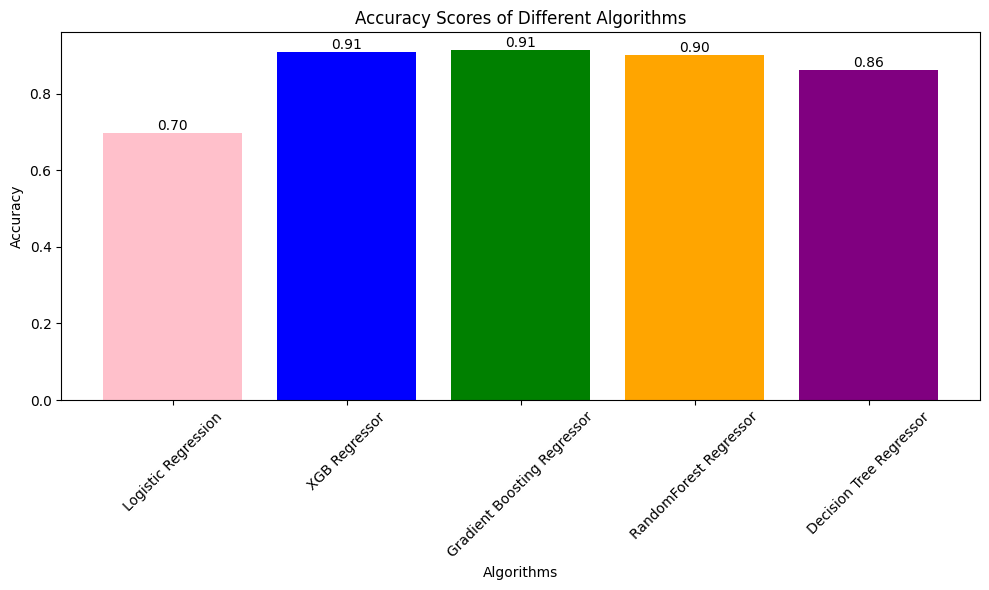

In [19]:
import matplotlib.pyplot as plt

# Define the accuracy scores for each algorithm
accuracy_scores = [lr_accuracy, xBoost_accuracy, gbr_accuracy, rfr_accuracy, dtr_accuracy]

# Define the algorithm names for the x-axis labels
algorithm_names = ['Logistic Regression', 'XGB Regressor', 'Gradient Boosting Regressor', 'RandomForest Regressor', 'Decision Tree Regressor']

# Define the colors for the bars
colors = ['pink', 'blue', 'green', 'orange', 'purple']

# Plot the accuracy scores
plt.figure(figsize=(10, 6))
plt.bar(algorithm_names, accuracy_scores, color=colors)  # Assign the colors to the bars
plt.title('Accuracy Scores of Different Algorithms')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)

# Add the accuracy values on top of the bars
for i, score in enumerate(accuracy_scores):
    plt.text(i, score, f'{score:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()
